# Autoregression
Here we fit NeuralProphet to data with 5-minute resolution (daily temperatures at Yosemite). 

In [1]:
if 'google.colab' in str(get_ipython()):
    !pip install git+https://github.com/ourownstory/neural_prophet.git # may take a while
    #!pip install neuralprophet # much faster, but may not have the latest upgrades/bugfixes
    data_location = "https://raw.githubusercontent.com/ourownstory/neural_prophet/master/"
else:
    data_location = "../"

In [2]:
import pandas as pd
from neuralprophet import NeuralProphet, set_log_level
# set_log_level("ERROR")

## Sparsifying the AR coefficients
The autoregression component of NeuralProphet is defined as a AR-Net ([paper](https://arxiv.org/abs/1911.12436), [github](https://github.com/ourownstory/AR-Net)).
Thus, we can set `ar_sparsity` to a number smaller one, if we like to induce sparsity in the AR coefficients. 

However, fitting a model with multiple components and regularizations can be harder to fit and you may need to take manual control over the training hyperparameters.


In [3]:
df = pd.read_csv(data_location + "example_data/yosemite_temps.csv")
# df.head(3)

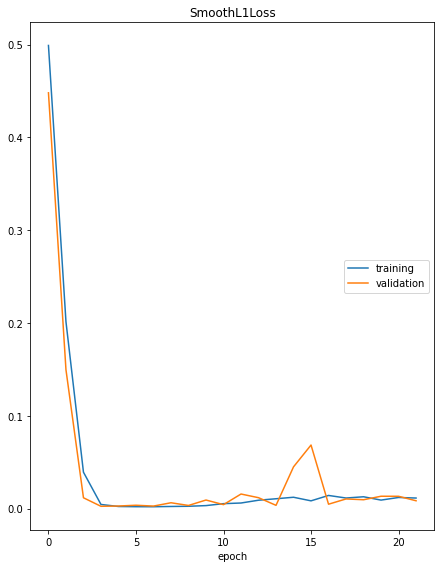

Epoch[23/65]:  35%|███▌      | 23/65 [00:15<00:29,  1.43it/s, SmoothL1Loss=0.00863, MAE=4.91, MSE=46.9, RegLoss=0.00736, MAE_val=4.2, MSE_val=28.4, SmoothL1Loss_val=0.00523]

In [ ]:
m = NeuralProphet(
    n_lags=6*12,
    n_forecasts=3*12,
    changepoints_range=0.95,
    n_changepoints=30,
    weekly_seasonality=False,
#     batch_size=64,
#     epochs=100,    
#     learning_rate=0.1,
    ar_sparsity=0.5,
)
metrics = m.fit(df, freq='5min', validate_each_epoch=True, plot_live_loss=True)

In [ ]:
future = m.make_future_dataframe(df, n_historic_predictions=True)
forecast = m.predict(future)
fig = m.plot(forecast)

In [ ]:
fig_param = m.plot_parameters()

In [ ]:
m = m.highlight_nth_step_ahead_of_each_forecast(3*12)
fig_param = m.plot_parameters()